# dataset preparation

In [1]:
import pandas as pd

data = pd.read_csv("./heart_disease_data.csv")
data.head()

age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1                     Yes      3.1    Upsloping                          Zero   
2                     Yes      2.6    Upsloping                          Zero   
3                      No      0.0  Downsloping                           One   
4                      No      1.9         Flat                         Three   

         thalassemia  target  
0  Reversable Defect       0  
1  Reversable Defect       0  
2  Reversable Defect       0  
3  Reversable Defect       0  
4       Fixed Defect       0

In [2]:
data.describe()

age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  1025.000000             1025.000000   1025.00000     1025.000000   
mean     54.434146              131.611707    246.00000      149.114146   
std       9.072290               17.516718     51.59251       23.005724   
min      29.000000               94.000000    126.00000       71.000000   
25%      48.000000              120.000000    211.00000      132.000000   
50%      56.000000              130.000000    240.00000      152.000000   
75%      61.000000              140.000000    275.00000      166.000000   
max      77.000000              200.000000    564.00000      202.000000   

           oldpeak       target  
count  1025.000000  1025.000000  
mean      1.071512     0.513171  
std       1.175053     0.500070  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.800000     1.000000  
75%       1.800000     1.000000  
max       6.200000     1.000000

In [3]:
data.shape

(1025, 14)

In [4]:
data.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak', 'target'],
      dtype='object')

Text(0.5, 1.0, 'class distribution')

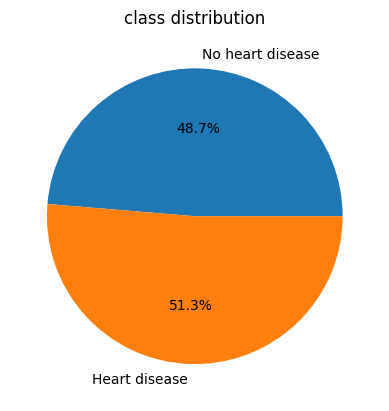

In [5]:
import matplotlib.pyplot as plt
# visualize class distribution & key features

class_counts=pd.Series(data['target']).value_counts().sort_index()
labels=['No heart disease', 'Heart disease']
plt.pie(class_counts.values, labels=labels, autopct="%1.1f%%")
plt.title('class distribution')


In [6]:
no_disease_data = data[data.target==0]
disease_data = data[data.target==1]

Text(0.5, 1.0, 'Age')

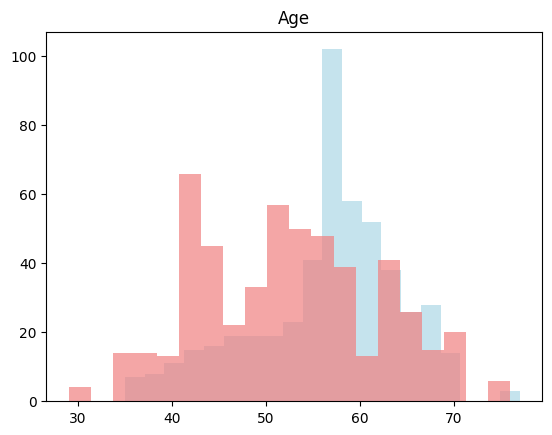

In [7]:
plt.hist(no_disease_data.age, alpha=0.7, label='no heart disease', bins=20, color='lightblue')
plt.hist(disease_data.age, alpha=0.7, label='heard disease', bins=20, color='lightcoral')
plt.title("Age")

Text(0.5, 1.0, 'Resting Blood Pressure')

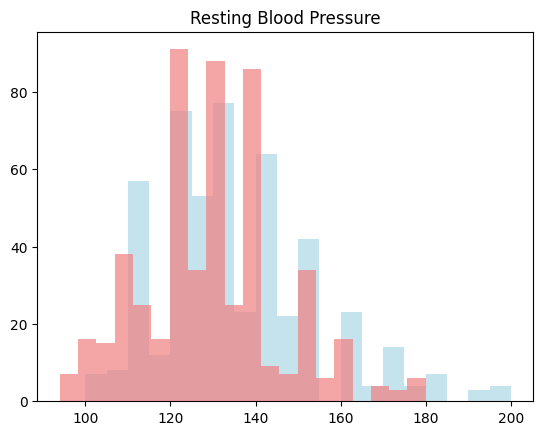

In [8]:
plt.hist(no_disease_data.resting_blood_pressure, alpha=0.7, label='no heart disease', bins=20, color='lightblue')
plt.hist(disease_data.resting_blood_pressure, alpha=0.7, label='heard disease', bins=20, color='lightcoral')
plt.title("Resting Blood Pressure")

Text(0.5, 1.0, 'Oldpeak')

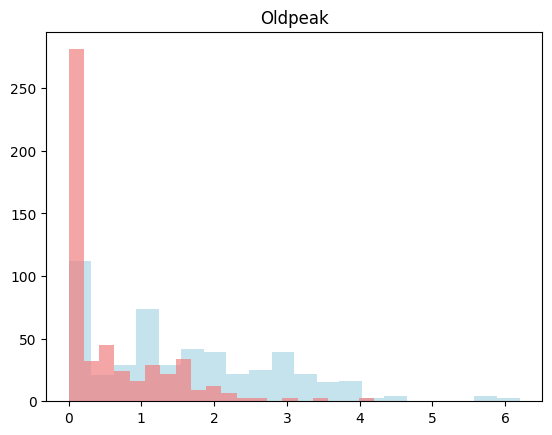

In [9]:
plt.hist(no_disease_data.oldpeak, alpha=0.7, label='no heart disease', bins=20, color='lightblue')
plt.hist(disease_data.oldpeak, alpha=0.7, label='heard disease', bins=20, color='lightcoral')
plt.title("Oldpeak")

In [10]:
# missing values
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [11]:
data.dtypes.value_counts()

object     8
int64      5
float64    1
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

x = data.drop('target', axis=1)
y = data.target

x.head()

age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0   18    1                3                      18           43   
1   19    1                3                      28           34   
2   36    1                3                      31           12   
3   27    1                3                      33           34   
4   28    0                3                      27          116   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2              67                        0   
1                    0         1              54                        1   
2                    1         2              25                        1   
3                    1         2              60                        0   
4                    0         2               9                        0   

   oldpeak  slope  vessels_colored_by_flourosopy  thalassemia  
0       10      0                              3            3  
1       29      2                              4            3  
2       25      2                              4            3  
3        0      0                              1            3  
4       18      1                              2            0

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((768, 13), (257, 13), (768,), (257,))

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

x_train.mean(axis=0).mean(), x_train_scaled.mean(axis=0).mean()

(np.float64(14.153245192307695), np.float64(1.7614115294533733e-17))

<Axes: >

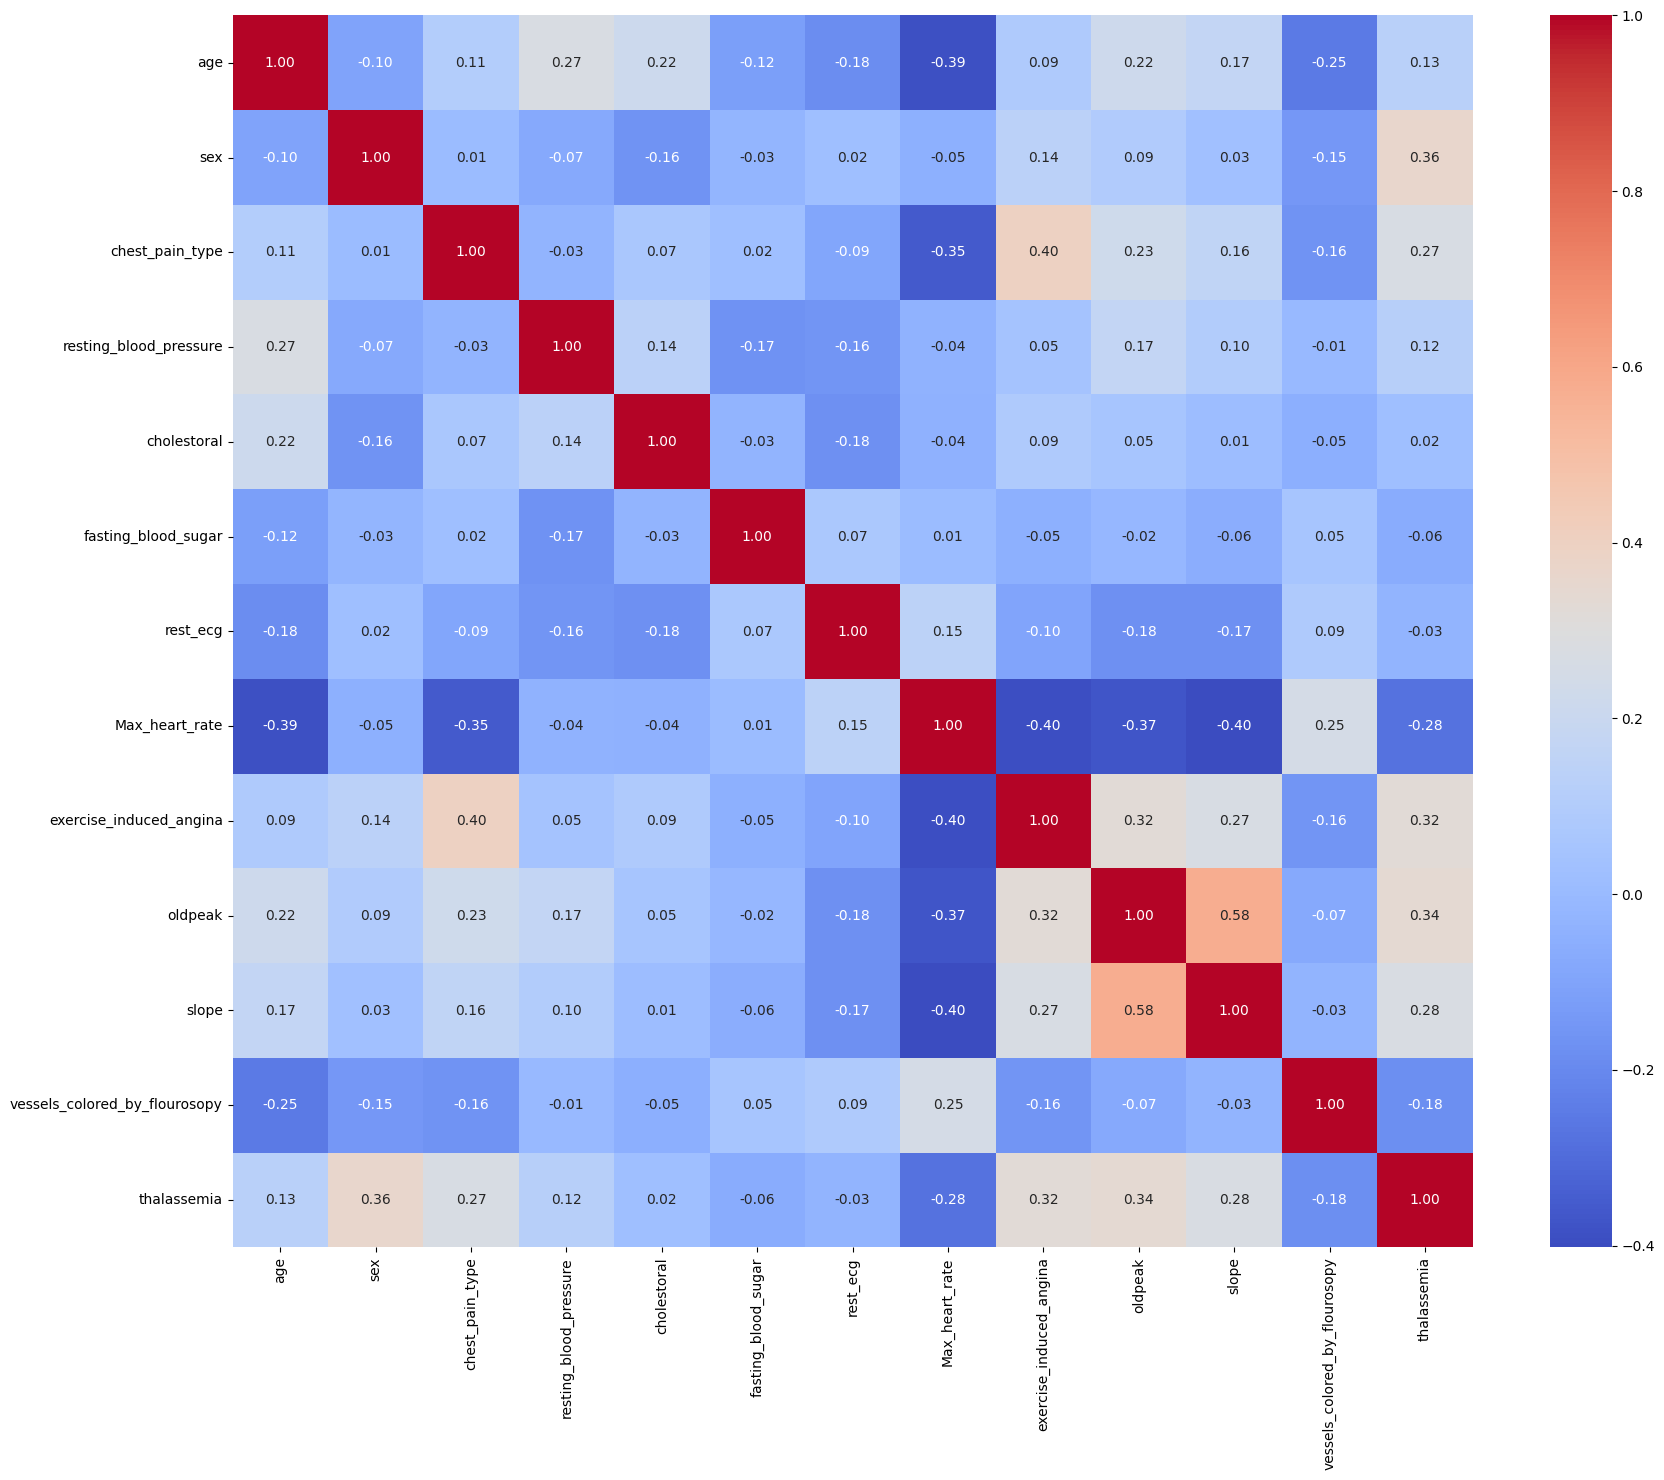

In [15]:
# correlation heatmap

import numpy as np
import seaborn as sns


correlation_matrix = x.corr()

plt.figure(figsize=(20, 16))

sns.heatmap(correlation_matrix, cmap='coolwarm', fmt="0.2f", annot=True)

In [16]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=435)
lr.fit(x_train_scaled, y_train)

y_pred = lr.predict(x_test_scaled)
y_pred_prob = lr.predict_proba(x_test_scaled)

y_pred[0:5], y_pred_prob[0:2]

(array([1, 1, 0, 1, 0]),
 array([[0.02107773, 0.97892227],
        [0.05321242, 0.94678758]]))

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross_validation_score = cross_val_score(lr, x_train_scaled, y_train, cv=5)
print("Cross validation score: ", cross_validation_score)

print("\nmean cross val score: ", cross_validation_score.mean())

Accuracy:  0.7782101167315175
Cross validation score:  [0.87012987 0.80519481 0.85064935 0.90196078 0.83006536]

mean cross val score:  0.8516000339529752


In [18]:
# classification report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       132
           1       0.75      0.82      0.78       125

    accuracy                           0.78       257
   macro avg       0.78      0.78      0.78       257
weighted avg       0.78      0.78      0.78       257



<Axes: >

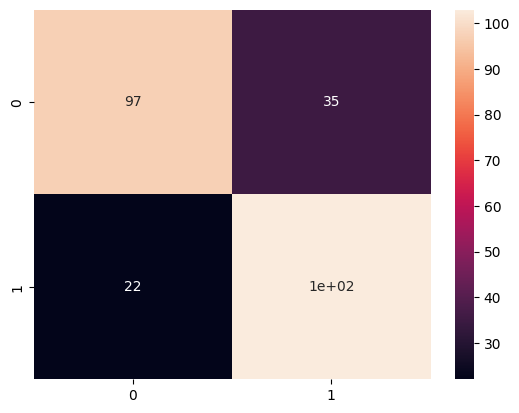

In [19]:
# confusion matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

<Axes: >

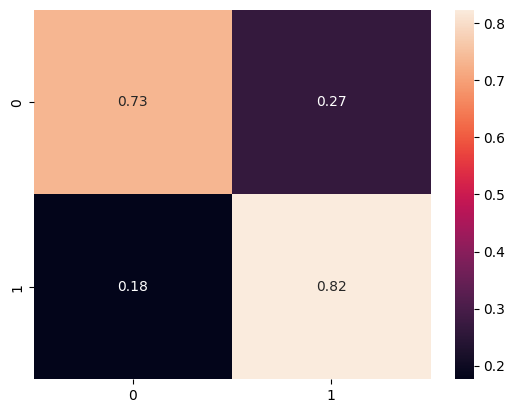

In [20]:
# normalize confusion matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [21]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 97,  35],
       [ 22, 103]])

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
true_neg, false_pos, false_neg, true_pos = cm.ravel()

print("True Negatives: ", true_neg)
print("False Positive: ", false_pos)
print("False Negative: ", false_neg)
print("True Positive: ", true_pos)

True Negatives:  97
False Positive:  35
False Negative:  22
True Positive:  103


ROC auc:  0.8716363636363637


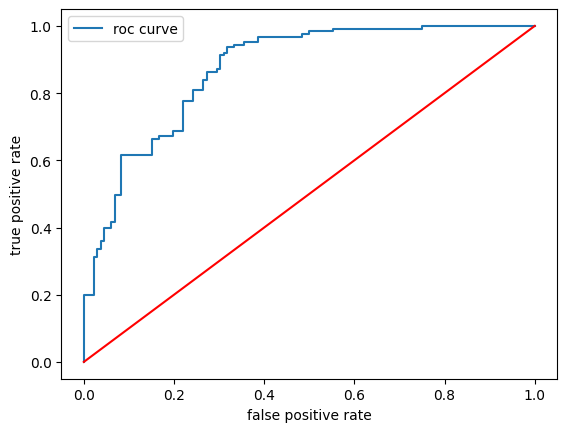

In [23]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = metrics.auc(fpr, tpr)

print('ROC auc: ', roc_auc)

plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], color='red')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

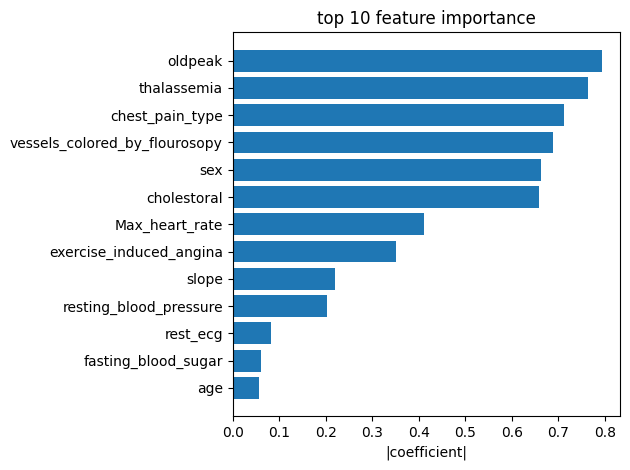

In [24]:
# feature importance

feature_importance = abs(lr.coef_[0])
feature_names=data.columns

sorted_idx = np.argsort(feature_importance)

# top 10 features
top_features = []
for i in sorted_idx:
    top_features.append(feature_names[i])

top_importance = feature_importance[sorted_idx]

plt.barh(range(len(top_features)), top_importance)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('|coefficient|')
plt.title("top 10 feature importance")
plt.tight_layout()

# multinomial naive bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)
y_pred_proba = mnb.predict_proba(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# cross-val
cv_score = cross_val_score(mnb, x_train, y_train, cv=5)
print("cv score: ", cv_score)
print("Mean cv score: ", cv_score.mean())

Accuracy:  0.6964980544747081
cv score:  [0.78571429 0.77272727 0.75324675 0.8496732  0.69281046]
Mean cv score:  0.7708343943638061


In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       132
           1       0.69      0.70      0.69       125

    accuracy                           0.70       257
   macro avg       0.70      0.70      0.70       257
weighted avg       0.70      0.70      0.70       257



<Axes: >

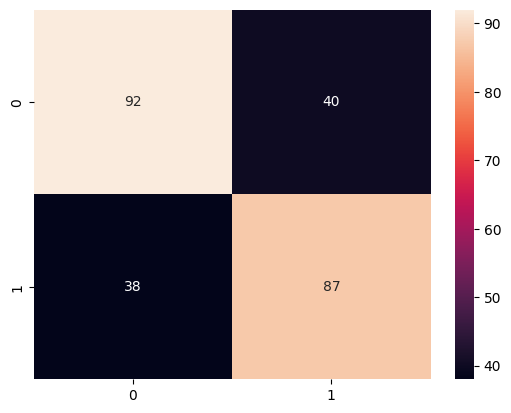

In [27]:
# confusion matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

ROC auc:  0.7816969696969697


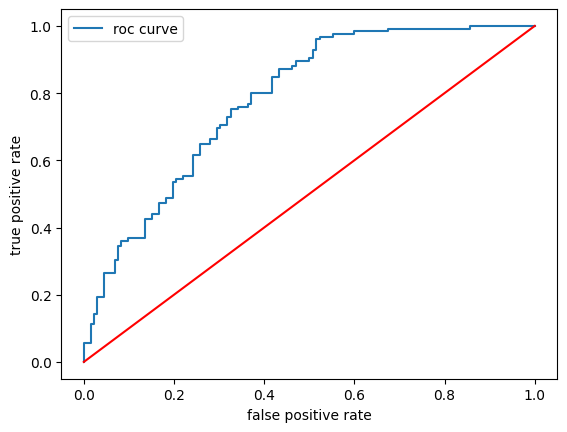

In [28]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = metrics.auc(fpr, tpr)

print('ROC auc: ', roc_auc)

plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], color='red')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

In [29]:
# feature importance

log_prob_ratio = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]

feature_importance = pd.Series(log_prob_ratio, index=x.columns)
feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

top_features = feature_importance.loc[feature_importance_sorted.index[:10]]
features = top_features.index
importances = top_features.values


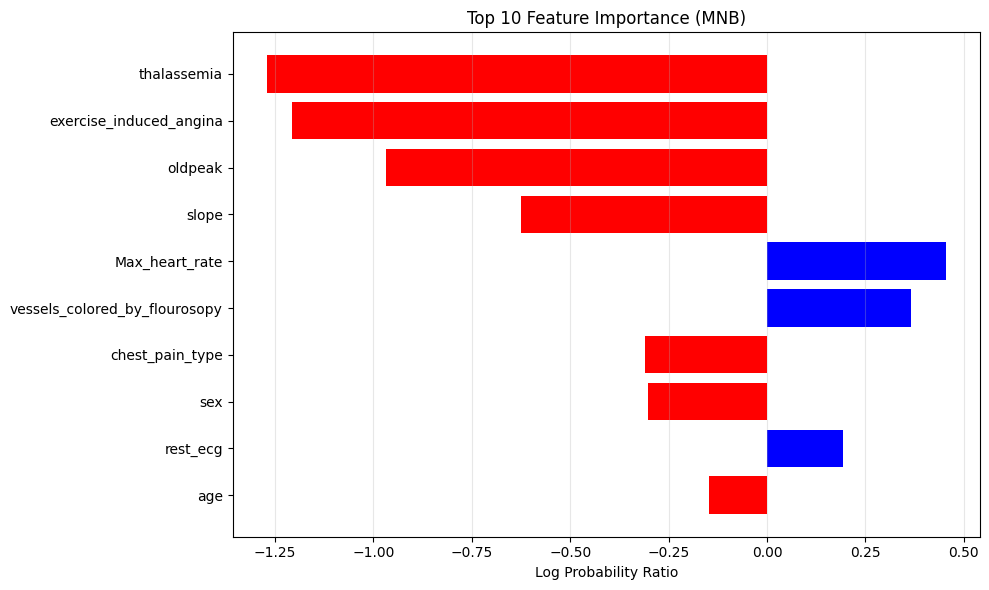

In [30]:
plt.figure(figsize=(10, 6)) # Reduced figure size
colors = ['blue' if imp > 0 else 'red' for imp in importances]

# Create the simple horizontal bar plot
plt.barh(features, importances, color=colors)

plt.title('Top 10 Feature Importance (MNB)')
plt.xlabel('Log Probability Ratio')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.tight_layout()
plt.show()

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


train_acc = rf.score(x_train, y_train)
test_acc = rf.score(x_test, y_test)

print("Train acc: ", train_acc)
print("test acc: ", test_acc)

print(metrics.classification_report(y_test, y_pred))

Train acc:  1.0
test acc:  0.9883268482490273
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



<Axes: >

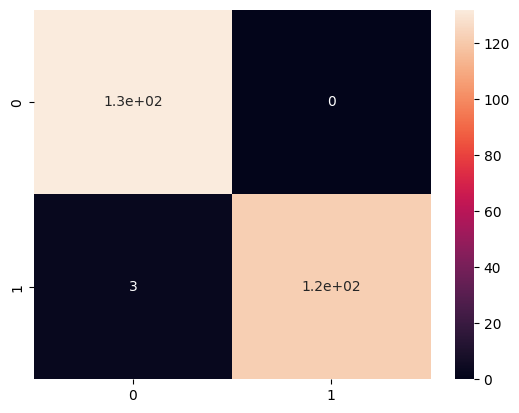

In [32]:
# confusion matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

13

/tmp/ipykernel_73251/2943982323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:8], y=feature_names[:8], palette='viridis')


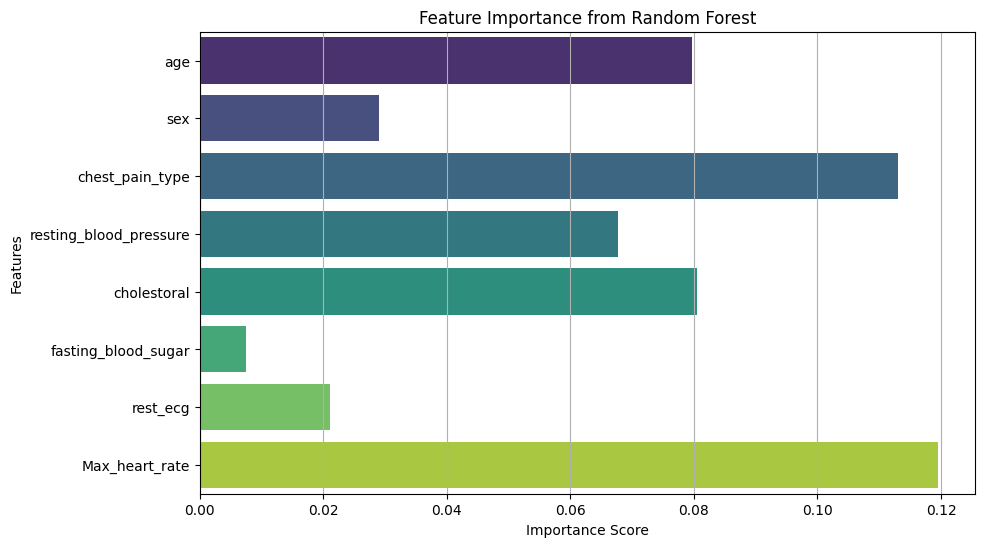

In [39]:
importances = rf.feature_importances_
feature_names = x.columns

# # Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:8], y=feature_names[:8], palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True, axis='x')
plt.show()

In [40]:
# visualizing the decision trees

from sklearn.tree import plot_tree

small_rf = RandomForestClassifier(n_estimators=1, max_depth=3)
small_rf.fit(x_train, y_train)

small_rf.score(x_train, y_train)

0.7942708333333334

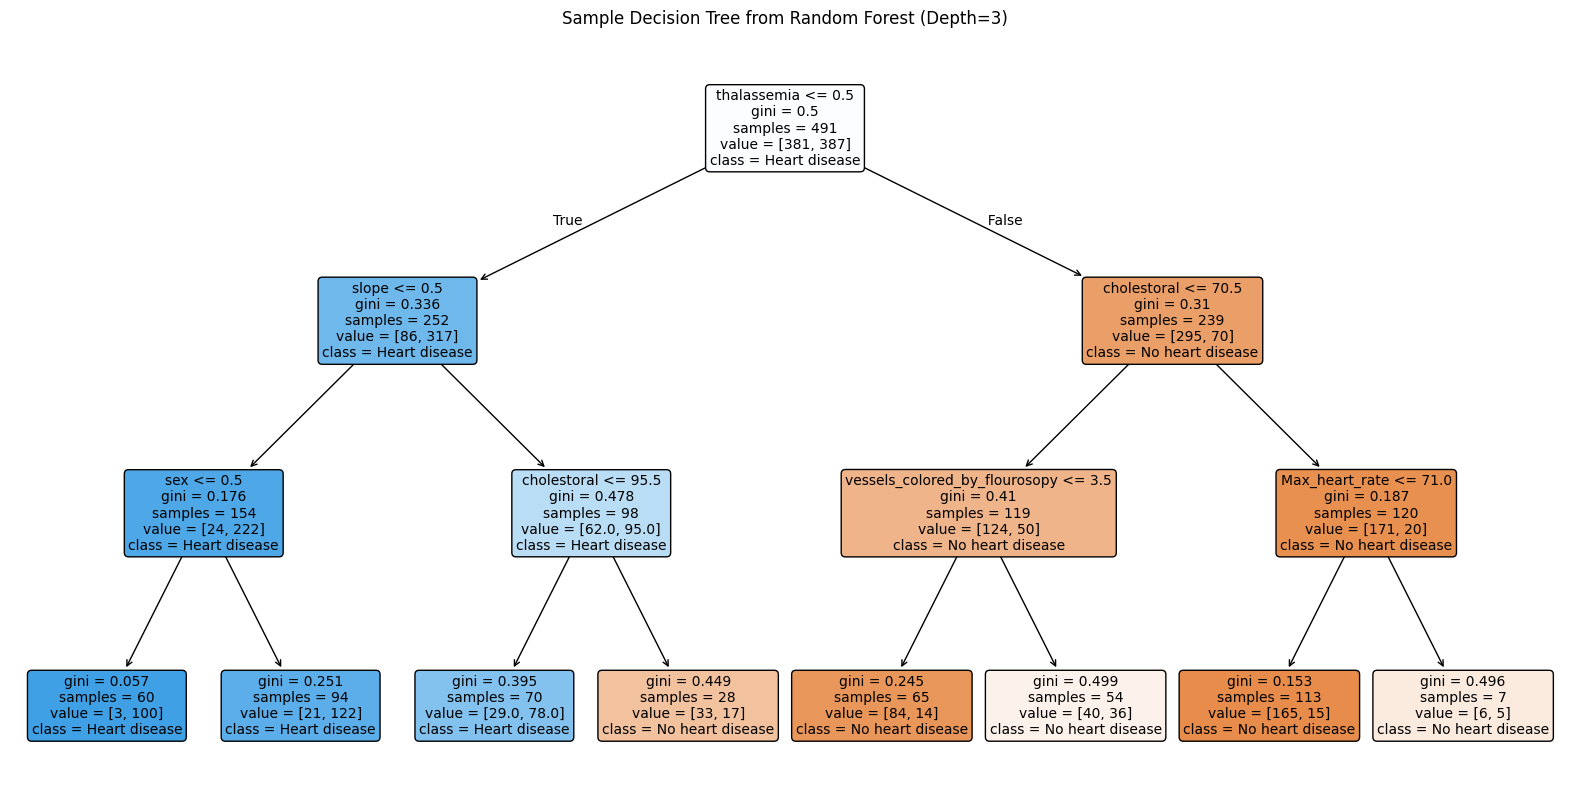

In [42]:
plt.figure(figsize=(20, 10))
plot_tree(small_rf.estimators_[0], 
          feature_names=data.columns,
          class_names=labels,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Sample Decision Tree from Random Forest (Depth=3)')
plt.show()

# svm algo

In [45]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(x_train_scaled, y_train)

    y_pred = svm_model.predict(x_test_scaled)

    accuracy = metrics.accuracy_score(y_test, y_pred)

    svm_results[kernel] = {
        'model': svm_model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    
    print(f"  {kernel.upper()} kernel accuracy: {accuracy:.4f}")

  LINEAR kernel accuracy: 0.7782
  POLY kernel accuracy: 0.9144
  RBF kernel accuracy: 0.9066
  SIGMOID kernel accuracy: 0.7082


Best performing kernel: poly


<Axes: >

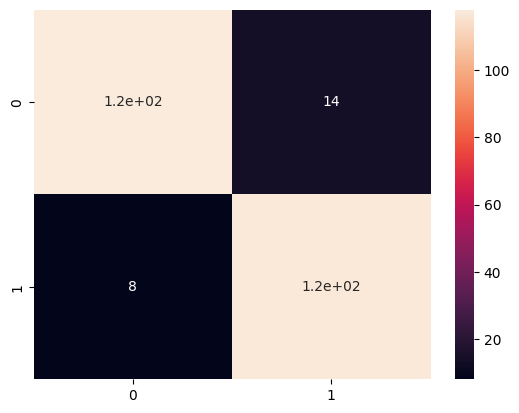

In [47]:
# Confusion matrices for best performing kernels
best_kernel = max(svm_results.keys(), key=lambda k: svm_results[k]['accuracy'])
print(f"Best performing kernel: {best_kernel}")

# Plot confusion matrix for best kernel
cm = metrics.confusion_matrix(y_test, svm_results[best_kernel]['predictions'])
sns.heatmap(cm, annot=True)

In [ ]:
# # Cross-validation scores for best kernel


# plt.subplot(2, 2, 3)
# cv_scores = cross_val_score(svm_results[best_kernel]['model'], X_train_scaled, y_train, cv=5)
# plt.boxplot(cv_scores)
# plt.title(f'Cross-Validation Scores - {best_kernel.upper()} Kernel')
# plt.ylabel('Accuracy')
# plt.xticks([1], ['5-Fold CV'])

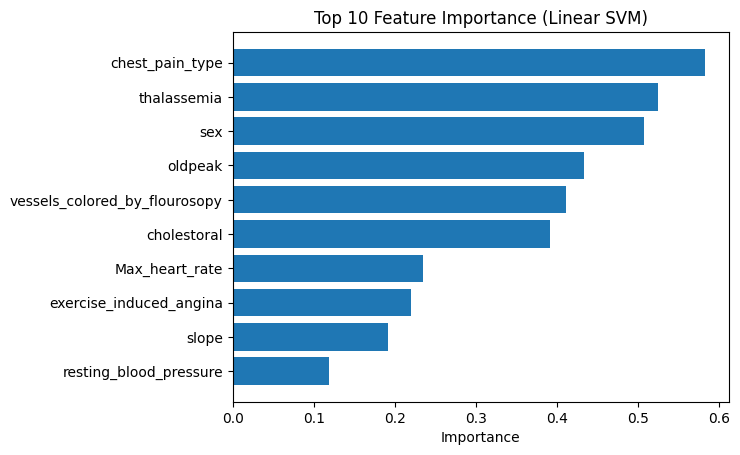

In [49]:
if 'linear' in svm_results:
    feature_importance = np.abs(svm_results['linear']['model'].coef_[0])
    top_features_idx = np.argsort(feature_importance)[-10:]
    top_features = [data.columns[i] for i in top_features_idx]
    top_importance = feature_importance[top_features_idx]
    
    plt.barh(range(len(top_features)), top_importance)
    plt.yticks(range(len(top_features)), top_features)
    plt.title('Top 10 Feature Importance (Linear SVM)')
    plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, 'Feature importance\nonly available for\nlinear kernel', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance')

# kmeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In [2]:
data = pd.read_csv('breast_cancer_data.csv')
print("Dataset loaded successfully. Shape:", data.shape)
data.head()

Dataset loaded successfully. Shape: (569, 6)


mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

Text(0, 0.5, 'Feature 2')

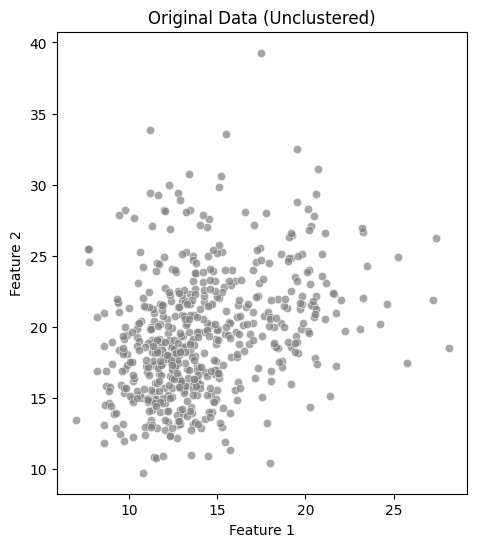

In [3]:
# Visualize the Original Data
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], color='grey', alpha=0.7)
plt.title('Original Data (Unclustered)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [4]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data)
kmeans_centers = kmeans.cluster_centers_

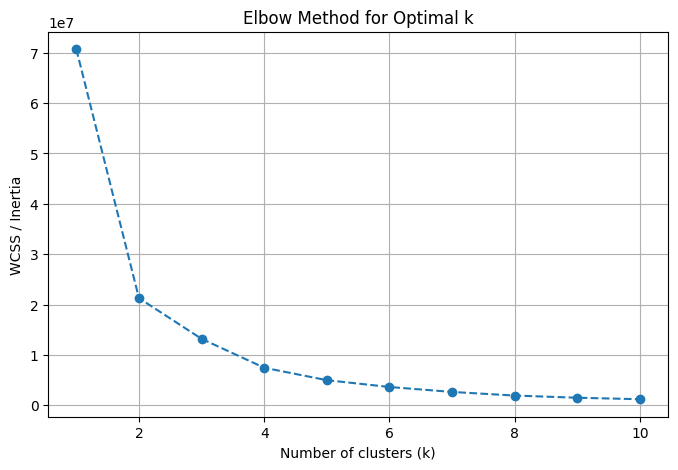

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


# applying GMM


In [6]:
# Apply GMM Clustering

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data)
gmm_centers = gmm.means_

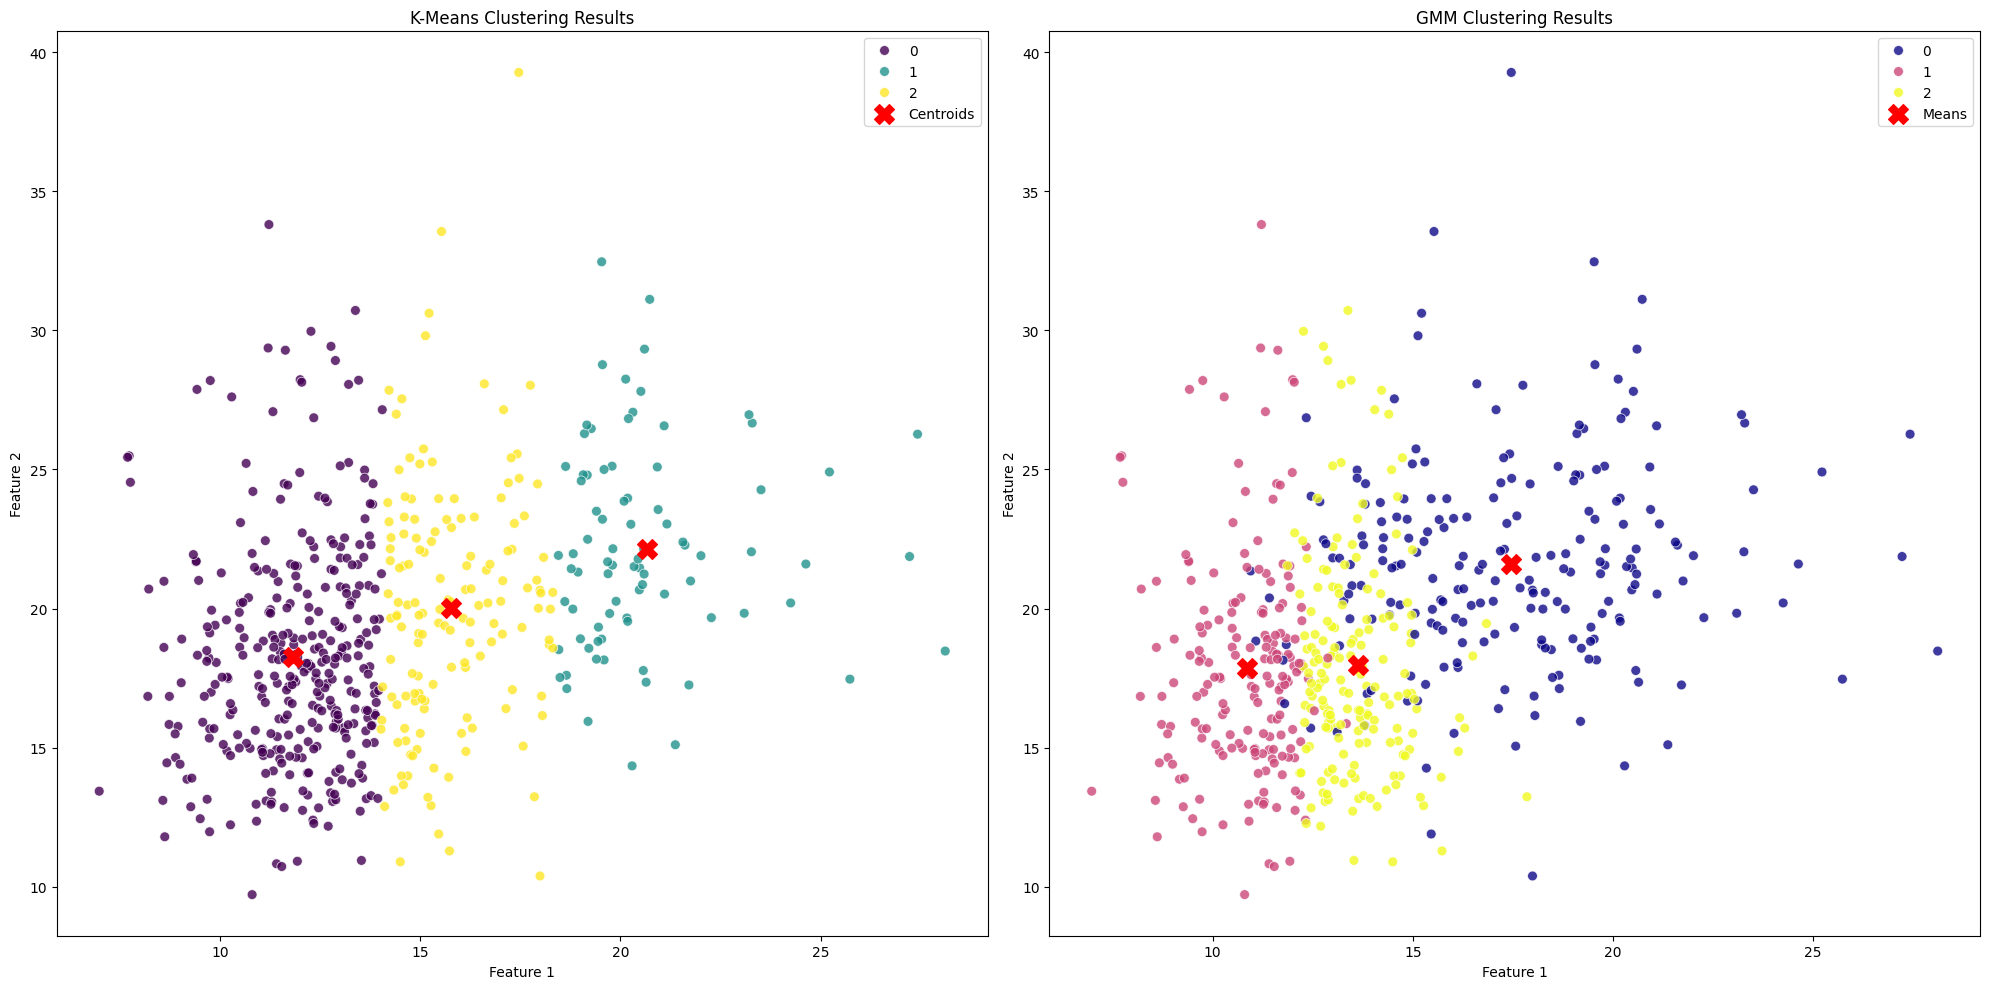

In [7]:
plt.figure(figsize=(20, 10))

# Plot K-Means results
plt.subplot(1, 2, 1)
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=kmeans_labels, palette='viridis', s=50, alpha=0.8)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot GMM results
plt.subplot(1, 2, 2)
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=gmm_labels, palette='plasma', s=50, alpha=0.8)
plt.scatter(gmm_centers[:, 0], gmm_centers[:, 1], s=200, c='red', marker='X', label='Means')
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:

from sklearn.metrics import silhouette_score

# Measures how similar a point is to its own cluster compared to other clusters.
kmeans_silhouette = silhouette_score(data, kmeans_labels)
gmm_silhouette = silhouette_score(data, gmm_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"GMM Silhouette Score:     {gmm_silhouette:.4f}")


K-Means Silhouette Score: 0.5654
GMM Silhouette Score:     0.3061


# PCA

In [9]:
import pandas as pd

data = pd.read_csv('iris_data.csv')
data.head()

sepal_len  sepal_width  petal_len  petal_width       target
0        5.1          3.5        1.4          0.2  Iris-setosa
1        4.9          3.0        1.4          0.2  Iris-setosa
2        4.7          3.2        1.3          0.2  Iris-setosa
3        4.6          3.1        1.5          0.2  Iris-setosa
4        5.0          3.6        1.4          0.2  Iris-setosa

In [10]:
data['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['target'] = le.fit_transform(data['target'])
data.head()

sepal_len  sepal_width  petal_len  petal_width  target
0        5.1          3.5        1.4          0.2       0
1        4.9          3.0        1.4          0.2       0
2        4.7          3.2        1.3          0.2       0
3        4.6          3.1        1.5          0.2       0
4        5.0          3.6        1.4          0.2       0

In [12]:
from sklearn.preprocessing import StandardScaler

x = data.iloc[:, :-1]

y = data.iloc[:, -1]


x_scaled = StandardScaler().fit_transform(x)

x_scaled.shape, y.shape


((150, 4), (150,))

In [13]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

principal_components = pca.fit_transform(x_scaled)

principal_data = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

principal_data.head()

pc1       pc2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767

In [14]:
final_data = pd.concat([principal_data, data['target']], axis=1)

final_data.head()

pc1       pc2  target
0 -2.264542  0.505704       0
1 -2.086426 -0.655405       0
2 -2.367950 -0.318477       0
3 -2.304197 -0.575368       0
4 -2.388777  0.674767       0

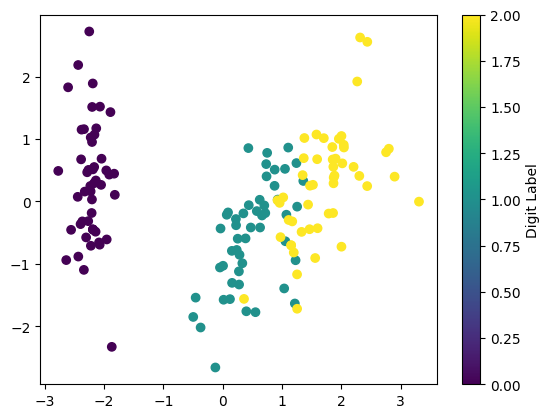

In [16]:

# import matplotlib.pyplot as plt 
# targets = data.target.unique()
# colors = ['r', 'g', 'b']

# for target, color in zip(targets, colors):
#     indices_to_keep = final_data['target'] == target
#     plt.scatter(final_data.loc[indices_to_keep, 'pc1'], final_data.loc[indices_to_keep, 'pc2'], c = color, s = 50)
# plt.legend(targets)
# plt.grid()
# plt.show()

import matplotlib.pyplot as plt

scatter = plt.scatter(final_data.iloc[:, 0], final_data.iloc[:, 1], c=final_data.target)
plt.colorbar(scatter, label='Digit Label')

In [17]:
pca_full = PCA().fit(x)
explained_variance = pca_full.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [18]:
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

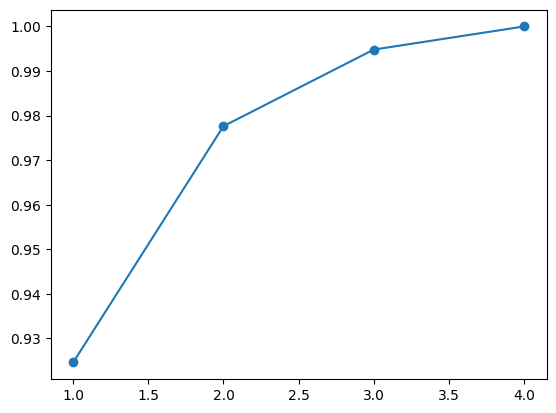

In [19]:
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')